<a href="https://colab.research.google.com/github/RenataRmz/mlops-repo/blob/main/notebooks/00.Exploration/Resultados_sobre_caracter%C3%ADsticas_del_entorno_urbano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd

In [2]:
# Crear carpeta de trabajo
os.makedirs("INEGI_Censo2020", exist_ok=True)
os.chdir("INEGI_Censo2020")

In [3]:
# ----------------------------
# 1. Descargar los archivos
# ----------------------------
!wget -O Censo_CL.zip "https://www.inegi.org.mx/contenidos/programas/ccpv/2020/microdatos/ceu/Censo2020_CEU_cdmx_csv.zip"

--2025-09-15 16:35:57--  https://www.inegi.org.mx/contenidos/programas/ccpv/2020/microdatos/ceu/Censo2020_CEU_cdmx_csv.zip
Resolving www.inegi.org.mx (www.inegi.org.mx)... 200.23.8.5
Connecting to www.inegi.org.mx (www.inegi.org.mx)|200.23.8.5|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4742083 (4.5M) [application/x-zip-compressed]
Saving to: ‘Censo_CL.zip’

Censo_CL.zip        100%[===================>]   4.52M   569KB/s    in 8.7s    

2025-09-15 16:36:06 (535 KB/s) - ‘Censo_CL.zip’ saved [4742083/4742083]



In [4]:
# ----------------------------
# 2. Descomprimir los ZIP
# ----------------------------
!unzip -o Censo_CL.zip -d Censo

Archive:  Censo_CL.zip
  inflating: Censo/TI_MANZANA_EU_09.csv  
  inflating: Censo/TR_VIALIDAD_EU_09.csv  


In [6]:
# ----------------------------
# 3. Cargar CSVs y Excel
# ----------------------------
# 3.1 Cargar archivo de personas (buscar el CSV dentro de la carpeta)
entorno_files = os.listdir("Censo")
entorno_path = os.path.join("Censo", entorno_files[0])
df_entorno = pd.read_csv(entorno_path, encoding="latin1")
df_entorno.head()

,ID_MZA,ENT,MUN,LOC,AGEB,MZA,PERSONAS,VIVPARHAB,TDELIM,TOTLADO,...,PUESAMBU_C,C_PAMBU_N,S_PAMBU_N,BANQUETA_C,C_BANQ_N,S_BANQ_N,GUARNICI_C,C_GUAR_N,S_GUAR_N,TAMLOC
0,555090000001982485,9,2,1,0010,1,159,48,1,4,...,3,0,4,1,4,0,1,4,0,9
1,555090000002497567,9,2,1,0010,2,145,42,1,4,...,3,0,4,1,4,0,1,4,0,9
2,555090000002497568,9,2,1,0010,3,124,32,1,4,...,3,0,4,2,3,1,1,4,0,9
3,555090000002497569,9,2,1,0010,4,158,42,1,4,...,3,0,4,1,4,0,1,4,0,9
4,555090000002497570,9,2,1,0010,5,154,45,1,4,...,3,0,4,1,4,0,1,4,0,9


In [7]:
df_entorno.shape

(51072, 77)

In [8]:
df_entorno.isnull().sum().sort_values()

,0
ID_MZA,0
ENT,0
MUN,0
LOC,0
AGEB,0
...,...
S_BANQ_N,0
GUARNICI_C,0
C_GUAR_N,0
S_GUAR_N,0


<Axes: ylabel='Frequency'>

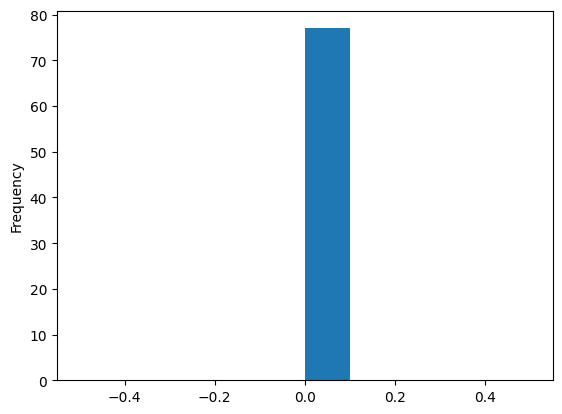

In [9]:
df_entorno.isnull().sum().sort_values().plot(kind = 'hist')